In [22]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras import backend as k

import matplotlib.pyplot as plt
import numpy as np

batch_size = 128
num_classes = 10
epochs = 1

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

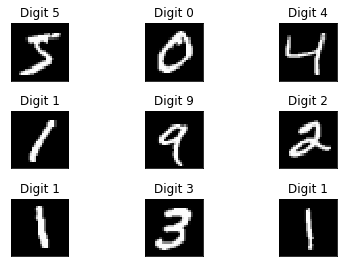

In [6]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
img_rows , img_cols = 28, 28

In [12]:
k.image_data_format()

'channels_last'

In [13]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [15]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_classes, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [17]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=True,
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


54400/60000 [==========================>...] - ETA: 10:49 - loss: 2.3214 - acc: 0.10 - ETA: 3:44 - loss: 2.2460 - acc: 0.1432 - ETA: 2:19 - loss: 2.1432 - acc: 0.218 - ETA: 1:43 - loss: 2.0739 - acc: 0.253 - ETA: 1:22 - loss: 1.9432 - acc: 0.315 - ETA: 1:09 - loss: 1.8550 - acc: 0.361 - ETA: 1:00 - loss: 1.7618 - acc: 0.396 - ETA: 54s - loss: 1.7062 - acc: 0.420 - ETA: 49s - loss: 1.6547 - acc: 0.44 - ETA: 45s - loss: 1.5849 - acc: 0.46 - ETA: 41s - loss: 1.5127 - acc: 0.49 - ETA: 39s - loss: 1.4644 - acc: 0.51 - ETA: 36s - loss: 1.4058 - acc: 0.53 - ETA: 35s - loss: 1.3578 - acc: 0.54 - ETA: 33s - loss: 1.3221 - acc: 0.56 - ETA: 31s - loss: 1.2726 - acc: 0.57 - ETA: 30s - loss: 1.2324 - acc: 0.59 - ETA: 29s - loss: 1.1969 - acc: 0.60 - ETA: 28s - loss: 1.1620 - acc: 0.61 - ETA: 27s - loss: 1.1306 - acc: 0.63 - ETA: 26s - loss: 1.0987 - acc: 0.64 - ETA: 25s - loss: 1.0659 - acc: 0.65 - ETA: 25s - loss: 1.0413 - acc: 0.66 - ETA: 24s - loss: 1.0160 - acc: 0.66 - ETA: 23s - loss: 0.9944 -

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0458 - acc: 0.98 - ETA: 13s - loss: 0.1128 - acc: 0.97 - ETA: 13s - loss: 0.0868 - acc: 0.97 - ETA: 13s - loss: 0.0977 - acc: 0.97 - ETA: 13s - loss: 0.0928 - acc: 0.97 - ETA: 13s - loss: 0.1104 - acc: 0.96 - ETA: 13s - loss: 0.1146 - acc: 0.96 - ETA: 13s - loss: 0.1095 - acc: 0.96 - ETA: 13s - loss: 0.1069 - acc: 0.96 - ETA: 13s - loss: 0.1002 - acc: 0.97 - ETA: 13s - loss: 0.1006 - acc: 0.96 - ETA: 13s - loss: 0.0980 - acc: 0.96 - ETA: 12s - loss: 0.0944 - acc: 0.97 - ETA: 12s - loss: 0.0950 - acc: 0.97 - ETA: 12s - loss: 0.0970 - acc: 0.97 - ETA: 12s - loss: 0.0968 - acc: 0.97 - ETA: 12s - loss: 0.0995 - acc: 0.96 - ETA: 12s - loss: 0.1012 - acc: 0.96 - ETA: 12s - loss: 0.1000 - acc: 0.97 - ETA: 12s - loss: 0.1004 - acc: 0.96 - ETA: 12s - loss: 0.1009 - acc: 0.96 - ETA: 12s - loss: 0.1009 - acc: 0.96 - ETA: 12s - loss: 0.1010 - acc: 0.96 - ETA: 12s - loss: 0.0996 - acc: 0.97 - ETA: 12s - loss: 0.1003 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0910 - acc: 0.973 - ETA: 1s - loss: 0.0910 - acc: 0.973 - ETA: 0s - loss: 0.0911 - acc: 0.973 - ETA: 0s - loss: 0.0909 - acc: 0.973 - ETA: 0s - loss: 0.0910 - acc: 0.973 - ETA: 0s - loss: 0.0912 - acc: 0.973 - ETA: 0s - loss: 0.0910 - acc: 0.973 - ETA: 0s - loss: 0.0910 - acc: 0.973 - ETA: 0s - loss: 0.0911 - acc: 0.973 - ETA: 0s - loss: 0.0910 - acc: 0.973 - ETA: 0s - loss: 0.0910 - acc: 0.973 - ETA: 0s - loss: 0.0913 - acc: 0.973 - ETA: 0s - loss: 0.0912 - acc: 0.973 - ETA: 0s - loss: 0.0913 - acc: 0.973 - ETA: 0s - loss: 0.0911 - acc: 0.973 - ETA: 0s - loss: 0.0910 - acc: 0.973 - ETA: 0s - loss: 0.0911 - acc: 0.973 - ETA: 0s - loss: 0.0913 - acc: 0.973 - ETA: 0s - loss: 0.0912 - acc: 0.973 - 14s 234us/step - loss: 0.0911 - acc: 0.9735 - val_loss: 0.0431 - val_acc: 0.9854
Epoch 3/20


54912/60000 [==========================>...] - ETA: 14s - loss: 0.0661 - acc: 0.97 - ETA: 13s - loss: 0.1126 - acc: 0.97 - ETA: 13s - loss: 0.0963 - acc: 0.98 - ETA: 13s - loss: 0.0812 - acc: 0.98 - ETA: 13s - loss: 0.0731 - acc: 0.98 - ETA: 13s - loss: 0.0715 - acc: 0.98 - ETA: 13s - loss: 0.0661 - acc: 0.98 - ETA: 13s - loss: 0.0617 - acc: 0.98 - ETA: 13s - loss: 0.0664 - acc: 0.98 - ETA: 13s - loss: 0.0677 - acc: 0.98 - ETA: 12s - loss: 0.0666 - acc: 0.98 - ETA: 12s - loss: 0.0636 - acc: 0.98 - ETA: 12s - loss: 0.0596 - acc: 0.98 - ETA: 12s - loss: 0.0590 - acc: 0.98 - ETA: 12s - loss: 0.0580 - acc: 0.98 - ETA: 12s - loss: 0.0613 - acc: 0.98 - ETA: 12s - loss: 0.0607 - acc: 0.98 - ETA: 12s - loss: 0.0592 - acc: 0.98 - ETA: 12s - loss: 0.0585 - acc: 0.98 - ETA: 12s - loss: 0.0578 - acc: 0.98 - ETA: 12s - loss: 0.0580 - acc: 0.98 - ETA: 12s - loss: 0.0597 - acc: 0.98 - ETA: 12s - loss: 0.0606 - acc: 0.98 - ETA: 12s - loss: 0.0597 - acc: 0.98 - ETA: 12s - loss: 0.0601 - acc: 0.98 - ETA

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0343 - acc: 0.99 - ETA: 13s - loss: 0.0407 - acc: 0.98 - ETA: 13s - loss: 0.0360 - acc: 0.98 - ETA: 13s - loss: 0.0290 - acc: 0.99 - ETA: 13s - loss: 0.0352 - acc: 0.98 - ETA: 13s - loss: 0.0530 - acc: 0.98 - ETA: 13s - loss: 0.0501 - acc: 0.98 - ETA: 13s - loss: 0.0510 - acc: 0.98 - ETA: 13s - loss: 0.0523 - acc: 0.98 - ETA: 13s - loss: 0.0502 - acc: 0.98 - ETA: 13s - loss: 0.0528 - acc: 0.98 - ETA: 13s - loss: 0.0540 - acc: 0.98 - ETA: 13s - loss: 0.0554 - acc: 0.98 - ETA: 13s - loss: 0.0565 - acc: 0.98 - ETA: 12s - loss: 0.0544 - acc: 0.98 - ETA: 12s - loss: 0.0536 - acc: 0.98 - ETA: 12s - loss: 0.0522 - acc: 0.98 - ETA: 12s - loss: 0.0543 - acc: 0.98 - ETA: 12s - loss: 0.0538 - acc: 0.98 - ETA: 12s - loss: 0.0538 - acc: 0.98 - ETA: 12s - loss: 0.0524 - acc: 0.98 - ETA: 12s - loss: 0.0519 - acc: 0.98 - ETA: 12s - loss: 0.0522 - acc: 0.98 - ETA: 12s - loss: 0.0533 - acc: 0.98 - ETA: 12s - loss: 0.0525 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0548 - acc: 0.983 - ETA: 1s - loss: 0.0548 - acc: 0.983 - ETA: 0s - loss: 0.0547 - acc: 0.983 - ETA: 0s - loss: 0.0547 - acc: 0.983 - ETA: 0s - loss: 0.0548 - acc: 0.983 - ETA: 0s - loss: 0.0548 - acc: 0.983 - ETA: 0s - loss: 0.0547 - acc: 0.983 - ETA: 0s - loss: 0.0549 - acc: 0.983 - ETA: 0s - loss: 0.0546 - acc: 0.983 - ETA: 0s - loss: 0.0546 - acc: 0.983 - ETA: 0s - loss: 0.0544 - acc: 0.983 - ETA: 0s - loss: 0.0547 - acc: 0.983 - ETA: 0s - loss: 0.0546 - acc: 0.983 - ETA: 0s - loss: 0.0546 - acc: 0.983 - ETA: 0s - loss: 0.0547 - acc: 0.983 - ETA: 0s - loss: 0.0546 - acc: 0.983 - ETA: 0s - loss: 0.0545 - acc: 0.983 - ETA: 0s - loss: 0.0547 - acc: 0.983 - ETA: 0s - loss: 0.0546 - acc: 0.983 - 14s 235us/step - loss: 0.0545 - acc: 0.9839 - val_loss: 0.0342 - val_acc: 0.9876
Epoch 5/20


54912/60000 [==========================>...] - ETA: 13s - loss: 0.0486 - acc: 0.98 - ETA: 13s - loss: 0.0753 - acc: 0.97 - ETA: 13s - loss: 0.0674 - acc: 0.97 - ETA: 13s - loss: 0.0546 - acc: 0.98 - ETA: 13s - loss: 0.0509 - acc: 0.98 - ETA: 13s - loss: 0.0553 - acc: 0.98 - ETA: 13s - loss: 0.0564 - acc: 0.98 - ETA: 13s - loss: 0.0569 - acc: 0.98 - ETA: 12s - loss: 0.0583 - acc: 0.97 - ETA: 12s - loss: 0.0580 - acc: 0.97 - ETA: 12s - loss: 0.0585 - acc: 0.97 - ETA: 12s - loss: 0.0626 - acc: 0.97 - ETA: 12s - loss: 0.0596 - acc: 0.97 - ETA: 12s - loss: 0.0561 - acc: 0.98 - ETA: 12s - loss: 0.0585 - acc: 0.97 - ETA: 12s - loss: 0.0563 - acc: 0.98 - ETA: 12s - loss: 0.0546 - acc: 0.98 - ETA: 12s - loss: 0.0553 - acc: 0.98 - ETA: 12s - loss: 0.0543 - acc: 0.98 - ETA: 12s - loss: 0.0540 - acc: 0.98 - ETA: 12s - loss: 0.0530 - acc: 0.98 - ETA: 12s - loss: 0.0526 - acc: 0.98 - ETA: 12s - loss: 0.0525 - acc: 0.98 - ETA: 12s - loss: 0.0540 - acc: 0.98 - ETA: 12s - loss: 0.0534 - acc: 0.98 - ETA

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0340 - acc: 0.99 - ETA: 13s - loss: 0.0525 - acc: 0.98 - ETA: 13s - loss: 0.0577 - acc: 0.98 - ETA: 13s - loss: 0.0503 - acc: 0.98 - ETA: 13s - loss: 0.0432 - acc: 0.98 - ETA: 13s - loss: 0.0469 - acc: 0.98 - ETA: 13s - loss: 0.0459 - acc: 0.98 - ETA: 12s - loss: 0.0421 - acc: 0.98 - ETA: 12s - loss: 0.0429 - acc: 0.98 - ETA: 12s - loss: 0.0439 - acc: 0.98 - ETA: 12s - loss: 0.0448 - acc: 0.98 - ETA: 12s - loss: 0.0433 - acc: 0.98 - ETA: 12s - loss: 0.0427 - acc: 0.98 - ETA: 12s - loss: 0.0423 - acc: 0.98 - ETA: 12s - loss: 0.0405 - acc: 0.98 - ETA: 12s - loss: 0.0394 - acc: 0.98 - ETA: 12s - loss: 0.0401 - acc: 0.98 - ETA: 12s - loss: 0.0409 - acc: 0.98 - ETA: 12s - loss: 0.0413 - acc: 0.98 - ETA: 12s - loss: 0.0417 - acc: 0.98 - ETA: 12s - loss: 0.0423 - acc: 0.98 - ETA: 12s - loss: 0.0429 - acc: 0.98 - ETA: 12s - loss: 0.0418 - acc: 0.98 - ETA: 12s - loss: 0.0412 - acc: 0.98 - ETA: 12s - loss: 0.0420 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0435 - acc: 0.986 - ETA: 1s - loss: 0.0433 - acc: 0.986 - ETA: 0s - loss: 0.0433 - acc: 0.986 - ETA: 0s - loss: 0.0433 - acc: 0.986 - ETA: 0s - loss: 0.0432 - acc: 0.986 - ETA: 0s - loss: 0.0430 - acc: 0.986 - ETA: 0s - loss: 0.0429 - acc: 0.986 - ETA: 0s - loss: 0.0429 - acc: 0.986 - ETA: 0s - loss: 0.0429 - acc: 0.986 - ETA: 0s - loss: 0.0428 - acc: 0.986 - ETA: 0s - loss: 0.0429 - acc: 0.986 - ETA: 0s - loss: 0.0428 - acc: 0.986 - ETA: 0s - loss: 0.0429 - acc: 0.986 - ETA: 0s - loss: 0.0428 - acc: 0.986 - ETA: 0s - loss: 0.0429 - acc: 0.986 - ETA: 0s - loss: 0.0428 - acc: 0.986 - ETA: 0s - loss: 0.0429 - acc: 0.986 - ETA: 0s - loss: 0.0428 - acc: 0.986 - ETA: 0s - loss: 0.0427 - acc: 0.986 - 14s 235us/step - loss: 0.0428 - acc: 0.9867 - val_loss: 0.0298 - val_acc: 0.9890
Epoch 7/20


54912/60000 [==========================>...] - ETA: 14s - loss: 0.0370 - acc: 0.97 - ETA: 13s - loss: 0.0354 - acc: 0.98 - ETA: 13s - loss: 0.0529 - acc: 0.98 - ETA: 13s - loss: 0.0516 - acc: 0.98 - ETA: 13s - loss: 0.0534 - acc: 0.98 - ETA: 13s - loss: 0.0483 - acc: 0.98 - ETA: 13s - loss: 0.0464 - acc: 0.98 - ETA: 13s - loss: 0.0424 - acc: 0.98 - ETA: 13s - loss: 0.0474 - acc: 0.98 - ETA: 12s - loss: 0.0445 - acc: 0.98 - ETA: 12s - loss: 0.0447 - acc: 0.98 - ETA: 12s - loss: 0.0454 - acc: 0.98 - ETA: 12s - loss: 0.0485 - acc: 0.98 - ETA: 12s - loss: 0.0463 - acc: 0.98 - ETA: 12s - loss: 0.0447 - acc: 0.98 - ETA: 12s - loss: 0.0447 - acc: 0.98 - ETA: 12s - loss: 0.0435 - acc: 0.98 - ETA: 12s - loss: 0.0430 - acc: 0.98 - ETA: 12s - loss: 0.0416 - acc: 0.98 - ETA: 12s - loss: 0.0400 - acc: 0.98 - ETA: 12s - loss: 0.0384 - acc: 0.98 - ETA: 12s - loss: 0.0399 - acc: 0.98 - ETA: 12s - loss: 0.0390 - acc: 0.98 - ETA: 12s - loss: 0.0394 - acc: 0.98 - ETA: 12s - loss: 0.0387 - acc: 0.98 - ETA

54912/60000 [==========================>...] - ETA: 16s - loss: 0.0498 - acc: 0.97 - ETA: 14s - loss: 0.0620 - acc: 0.97 - ETA: 13s - loss: 0.0495 - acc: 0.98 - ETA: 13s - loss: 0.0482 - acc: 0.98 - ETA: 13s - loss: 0.0507 - acc: 0.98 - ETA: 13s - loss: 0.0472 - acc: 0.98 - ETA: 13s - loss: 0.0490 - acc: 0.98 - ETA: 13s - loss: 0.0490 - acc: 0.98 - ETA: 13s - loss: 0.0483 - acc: 0.98 - ETA: 13s - loss: 0.0461 - acc: 0.98 - ETA: 12s - loss: 0.0447 - acc: 0.98 - ETA: 12s - loss: 0.0440 - acc: 0.98 - ETA: 12s - loss: 0.0478 - acc: 0.98 - ETA: 12s - loss: 0.0473 - acc: 0.98 - ETA: 12s - loss: 0.0488 - acc: 0.98 - ETA: 12s - loss: 0.0470 - acc: 0.98 - ETA: 12s - loss: 0.0448 - acc: 0.98 - ETA: 12s - loss: 0.0461 - acc: 0.98 - ETA: 12s - loss: 0.0446 - acc: 0.98 - ETA: 12s - loss: 0.0443 - acc: 0.98 - ETA: 12s - loss: 0.0433 - acc: 0.98 - ETA: 12s - loss: 0.0431 - acc: 0.98 - ETA: 12s - loss: 0.0423 - acc: 0.98 - ETA: 12s - loss: 0.0412 - acc: 0.98 - ETA: 12s - loss: 0.0414 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0346 - acc: 0.989 - ETA: 1s - loss: 0.0346 - acc: 0.989 - ETA: 0s - loss: 0.0346 - acc: 0.989 - ETA: 0s - loss: 0.0346 - acc: 0.989 - ETA: 0s - loss: 0.0346 - acc: 0.989 - ETA: 0s - loss: 0.0346 - acc: 0.989 - ETA: 0s - loss: 0.0346 - acc: 0.989 - ETA: 0s - loss: 0.0346 - acc: 0.989 - ETA: 0s - loss: 0.0345 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.989 - ETA: 0s - loss: 0.0345 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.989 - ETA: 0s - loss: 0.0345 - acc: 0.989 - ETA: 0s - loss: 0.0344 - acc: 0.989 - 14s 235us/step - loss: 0.0344 - acc: 0.9894 - val_loss: 0.0286 - val_acc: 0.9896
Epoch 9/20


54912/60000 [==========================>...] - ETA: 14s - loss: 0.0317 - acc: 0.97 - ETA: 13s - loss: 0.0324 - acc: 0.98 - ETA: 13s - loss: 0.0302 - acc: 0.98 - ETA: 13s - loss: 0.0347 - acc: 0.98 - ETA: 13s - loss: 0.0297 - acc: 0.98 - ETA: 13s - loss: 0.0299 - acc: 0.98 - ETA: 13s - loss: 0.0313 - acc: 0.98 - ETA: 13s - loss: 0.0308 - acc: 0.98 - ETA: 13s - loss: 0.0286 - acc: 0.98 - ETA: 13s - loss: 0.0277 - acc: 0.98 - ETA: 12s - loss: 0.0282 - acc: 0.98 - ETA: 12s - loss: 0.0282 - acc: 0.98 - ETA: 12s - loss: 0.0283 - acc: 0.98 - ETA: 12s - loss: 0.0276 - acc: 0.98 - ETA: 12s - loss: 0.0277 - acc: 0.98 - ETA: 12s - loss: 0.0265 - acc: 0.99 - ETA: 12s - loss: 0.0333 - acc: 0.98 - ETA: 12s - loss: 0.0331 - acc: 0.98 - ETA: 12s - loss: 0.0349 - acc: 0.98 - ETA: 12s - loss: 0.0341 - acc: 0.98 - ETA: 12s - loss: 0.0343 - acc: 0.98 - ETA: 12s - loss: 0.0335 - acc: 0.98 - ETA: 12s - loss: 0.0334 - acc: 0.98 - ETA: 12s - loss: 0.0343 - acc: 0.98 - ETA: 12s - loss: 0.0332 - acc: 0.98 - ETA

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0254 - acc: 0.99 - ETA: 13s - loss: 0.0163 - acc: 0.99 - ETA: 13s - loss: 0.0384 - acc: 0.98 - ETA: 13s - loss: 0.0336 - acc: 0.98 - ETA: 13s - loss: 0.0408 - acc: 0.98 - ETA: 13s - loss: 0.0385 - acc: 0.98 - ETA: 13s - loss: 0.0336 - acc: 0.98 - ETA: 13s - loss: 0.0346 - acc: 0.99 - ETA: 12s - loss: 0.0328 - acc: 0.99 - ETA: 12s - loss: 0.0315 - acc: 0.99 - ETA: 12s - loss: 0.0322 - acc: 0.99 - ETA: 12s - loss: 0.0311 - acc: 0.99 - ETA: 12s - loss: 0.0301 - acc: 0.99 - ETA: 12s - loss: 0.0338 - acc: 0.99 - ETA: 12s - loss: 0.0327 - acc: 0.99 - ETA: 12s - loss: 0.0320 - acc: 0.99 - ETA: 12s - loss: 0.0312 - acc: 0.99 - ETA: 12s - loss: 0.0299 - acc: 0.99 - ETA: 12s - loss: 0.0300 - acc: 0.99 - ETA: 12s - loss: 0.0295 - acc: 0.99 - ETA: 12s - loss: 0.0302 - acc: 0.99 - ETA: 12s - loss: 0.0309 - acc: 0.99 - ETA: 12s - loss: 0.0301 - acc: 0.99 - ETA: 12s - loss: 0.0308 - acc: 0.99 - ETA: 11s - loss: 0.0303 - acc: 0.99 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0276 - acc: 0.991 - ETA: 1s - loss: 0.0275 - acc: 0.991 - ETA: 0s - loss: 0.0276 - acc: 0.991 - ETA: 0s - loss: 0.0275 - acc: 0.991 - ETA: 0s - loss: 0.0274 - acc: 0.991 - ETA: 0s - loss: 0.0273 - acc: 0.991 - ETA: 0s - loss: 0.0276 - acc: 0.991 - ETA: 0s - loss: 0.0276 - acc: 0.991 - ETA: 0s - loss: 0.0277 - acc: 0.991 - ETA: 0s - loss: 0.0276 - acc: 0.991 - ETA: 0s - loss: 0.0277 - acc: 0.991 - ETA: 0s - loss: 0.0276 - acc: 0.991 - ETA: 0s - loss: 0.0277 - acc: 0.991 - ETA: 0s - loss: 0.0278 - acc: 0.991 - ETA: 0s - loss: 0.0278 - acc: 0.991 - ETA: 0s - loss: 0.0277 - acc: 0.991 - ETA: 0s - loss: 0.0279 - acc: 0.991 - ETA: 0s - loss: 0.0279 - acc: 0.991 - ETA: 0s - loss: 0.0282 - acc: 0.991 - 14s 235us/step - loss: 0.0281 - acc: 0.9914 - val_loss: 0.0249 - val_acc: 0.9920
Epoch 11/20


54784/60000 [==========================>...] - ETA: 15s - loss: 0.0094 - acc: 1.00 - ETA: 14s - loss: 0.0739 - acc: 0.98 - ETA: 13s - loss: 0.0474 - acc: 0.99 - ETA: 13s - loss: 0.0394 - acc: 0.99 - ETA: 13s - loss: 0.0383 - acc: 0.99 - ETA: 13s - loss: 0.0385 - acc: 0.99 - ETA: 13s - loss: 0.0348 - acc: 0.99 - ETA: 13s - loss: 0.0319 - acc: 0.99 - ETA: 13s - loss: 0.0306 - acc: 0.99 - ETA: 13s - loss: 0.0313 - acc: 0.99 - ETA: 13s - loss: 0.0310 - acc: 0.99 - ETA: 13s - loss: 0.0312 - acc: 0.99 - ETA: 12s - loss: 0.0300 - acc: 0.99 - ETA: 12s - loss: 0.0307 - acc: 0.99 - ETA: 12s - loss: 0.0298 - acc: 0.99 - ETA: 12s - loss: 0.0285 - acc: 0.99 - ETA: 12s - loss: 0.0286 - acc: 0.99 - ETA: 12s - loss: 0.0273 - acc: 0.99 - ETA: 12s - loss: 0.0263 - acc: 0.99 - ETA: 12s - loss: 0.0276 - acc: 0.99 - ETA: 12s - loss: 0.0278 - acc: 0.99 - ETA: 12s - loss: 0.0275 - acc: 0.99 - ETA: 12s - loss: 0.0271 - acc: 0.99 - ETA: 12s - loss: 0.0266 - acc: 0.99 - ETA: 12s - loss: 0.0270 - acc: 0.99 - ETA

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0465 - acc: 0.98 - ETA: 12s - loss: 0.0240 - acc: 0.99 - ETA: 12s - loss: 0.0267 - acc: 0.99 - ETA: 12s - loss: 0.0278 - acc: 0.98 - ETA: 12s - loss: 0.0246 - acc: 0.99 - ETA: 12s - loss: 0.0216 - acc: 0.99 - ETA: 12s - loss: 0.0201 - acc: 0.99 - ETA: 12s - loss: 0.0198 - acc: 0.99 - ETA: 12s - loss: 0.0204 - acc: 0.99 - ETA: 12s - loss: 0.0195 - acc: 0.99 - ETA: 12s - loss: 0.0182 - acc: 0.99 - ETA: 12s - loss: 0.0181 - acc: 0.99 - ETA: 12s - loss: 0.0224 - acc: 0.99 - ETA: 12s - loss: 0.0223 - acc: 0.99 - ETA: 12s - loss: 0.0216 - acc: 0.99 - ETA: 12s - loss: 0.0227 - acc: 0.99 - ETA: 12s - loss: 0.0230 - acc: 0.99 - ETA: 12s - loss: 0.0230 - acc: 0.99 - ETA: 12s - loss: 0.0266 - acc: 0.99 - ETA: 12s - loss: 0.0266 - acc: 0.99 - ETA: 12s - loss: 0.0267 - acc: 0.99 - ETA: 12s - loss: 0.0283 - acc: 0.99 - ETA: 12s - loss: 0.0275 - acc: 0.99 - ETA: 12s - loss: 0.0282 - acc: 0.99 - ETA: 11s - loss: 0.0294 - acc: 0.99 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0271 - acc: 0.992 - ETA: 1s - loss: 0.0272 - acc: 0.992 - ETA: 0s - loss: 0.0272 - acc: 0.992 - ETA: 0s - loss: 0.0272 - acc: 0.992 - ETA: 0s - loss: 0.0271 - acc: 0.992 - ETA: 0s - loss: 0.0270 - acc: 0.992 - ETA: 0s - loss: 0.0272 - acc: 0.992 - ETA: 0s - loss: 0.0272 - acc: 0.992 - ETA: 0s - loss: 0.0272 - acc: 0.992 - ETA: 0s - loss: 0.0272 - acc: 0.992 - ETA: 0s - loss: 0.0271 - acc: 0.992 - ETA: 0s - loss: 0.0271 - acc: 0.992 - ETA: 0s - loss: 0.0270 - acc: 0.992 - ETA: 0s - loss: 0.0269 - acc: 0.992 - ETA: 0s - loss: 0.0270 - acc: 0.992 - ETA: 0s - loss: 0.0270 - acc: 0.992 - ETA: 0s - loss: 0.0269 - acc: 0.992 - ETA: 0s - loss: 0.0268 - acc: 0.992 - ETA: 0s - loss: 0.0268 - acc: 0.992 - 14s 235us/step - loss: 0.0268 - acc: 0.9922 - val_loss: 0.0269 - val_acc: 0.9919
Epoch 13/20


54912/60000 [==========================>...] - ETA: 13s - loss: 0.0262 - acc: 0.99 - ETA: 13s - loss: 0.0186 - acc: 0.98 - ETA: 13s - loss: 0.0152 - acc: 0.99 - ETA: 13s - loss: 0.0129 - acc: 0.99 - ETA: 13s - loss: 0.0262 - acc: 0.99 - ETA: 13s - loss: 0.0236 - acc: 0.99 - ETA: 13s - loss: 0.0244 - acc: 0.99 - ETA: 13s - loss: 0.0285 - acc: 0.98 - ETA: 13s - loss: 0.0260 - acc: 0.99 - ETA: 12s - loss: 0.0272 - acc: 0.98 - ETA: 12s - loss: 0.0260 - acc: 0.98 - ETA: 12s - loss: 0.0243 - acc: 0.99 - ETA: 12s - loss: 0.0241 - acc: 0.99 - ETA: 12s - loss: 0.0227 - acc: 0.99 - ETA: 12s - loss: 0.0224 - acc: 0.99 - ETA: 12s - loss: 0.0220 - acc: 0.99 - ETA: 12s - loss: 0.0219 - acc: 0.99 - ETA: 12s - loss: 0.0221 - acc: 0.99 - ETA: 12s - loss: 0.0219 - acc: 0.99 - ETA: 12s - loss: 0.0218 - acc: 0.99 - ETA: 12s - loss: 0.0219 - acc: 0.99 - ETA: 12s - loss: 0.0218 - acc: 0.99 - ETA: 12s - loss: 0.0212 - acc: 0.99 - ETA: 12s - loss: 0.0206 - acc: 0.99 - ETA: 12s - loss: 0.0229 - acc: 0.99 - ETA

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0055 - acc: 1.00 - ETA: 13s - loss: 0.0147 - acc: 0.99 - ETA: 13s - loss: 0.0206 - acc: 0.99 - ETA: 13s - loss: 0.0218 - acc: 0.99 - ETA: 13s - loss: 0.0181 - acc: 0.99 - ETA: 13s - loss: 0.0171 - acc: 0.99 - ETA: 13s - loss: 0.0182 - acc: 0.99 - ETA: 13s - loss: 0.0162 - acc: 0.99 - ETA: 13s - loss: 0.0145 - acc: 0.99 - ETA: 13s - loss: 0.0140 - acc: 0.99 - ETA: 13s - loss: 0.0142 - acc: 0.99 - ETA: 13s - loss: 0.0132 - acc: 0.99 - ETA: 12s - loss: 0.0127 - acc: 0.99 - ETA: 12s - loss: 0.0128 - acc: 0.99 - ETA: 12s - loss: 0.0130 - acc: 0.99 - ETA: 12s - loss: 0.0153 - acc: 0.99 - ETA: 12s - loss: 0.0149 - acc: 0.99 - ETA: 12s - loss: 0.0153 - acc: 0.99 - ETA: 12s - loss: 0.0168 - acc: 0.99 - ETA: 12s - loss: 0.0163 - acc: 0.99 - ETA: 12s - loss: 0.0161 - acc: 0.99 - ETA: 12s - loss: 0.0165 - acc: 0.99 - ETA: 12s - loss: 0.0161 - acc: 0.99 - ETA: 12s - loss: 0.0167 - acc: 0.99 - ETA: 12s - loss: 0.0169 - acc: 0.99 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0236 - acc: 0.992 - ETA: 1s - loss: 0.0236 - acc: 0.992 - ETA: 0s - loss: 0.0236 - acc: 0.992 - ETA: 0s - loss: 0.0235 - acc: 0.992 - ETA: 0s - loss: 0.0235 - acc: 0.992 - ETA: 0s - loss: 0.0235 - acc: 0.992 - ETA: 0s - loss: 0.0235 - acc: 0.992 - ETA: 0s - loss: 0.0235 - acc: 0.992 - ETA: 0s - loss: 0.0235 - acc: 0.992 - ETA: 0s - loss: 0.0234 - acc: 0.992 - ETA: 0s - loss: 0.0233 - acc: 0.992 - ETA: 0s - loss: 0.0234 - acc: 0.992 - ETA: 0s - loss: 0.0233 - acc: 0.992 - ETA: 0s - loss: 0.0233 - acc: 0.992 - ETA: 0s - loss: 0.0233 - acc: 0.992 - ETA: 0s - loss: 0.0232 - acc: 0.992 - ETA: 0s - loss: 0.0232 - acc: 0.992 - ETA: 0s - loss: 0.0231 - acc: 0.992 - ETA: 0s - loss: 0.0231 - acc: 0.992 - 14s 235us/step - loss: 0.0231 - acc: 0.9928 - val_loss: 0.0301 - val_acc: 0.9902
Epoch 15/20


54784/60000 [==========================>...] - ETA: 14s - loss: 0.1370 - acc: 0.99 - ETA: 13s - loss: 0.0620 - acc: 0.99 - ETA: 13s - loss: 0.0436 - acc: 0.99 - ETA: 13s - loss: 0.0397 - acc: 0.99 - ETA: 13s - loss: 0.0387 - acc: 0.98 - ETA: 13s - loss: 0.0397 - acc: 0.98 - ETA: 13s - loss: 0.0354 - acc: 0.98 - ETA: 13s - loss: 0.0343 - acc: 0.99 - ETA: 13s - loss: 0.0336 - acc: 0.99 - ETA: 12s - loss: 0.0311 - acc: 0.99 - ETA: 12s - loss: 0.0297 - acc: 0.99 - ETA: 12s - loss: 0.0302 - acc: 0.99 - ETA: 12s - loss: 0.0299 - acc: 0.99 - ETA: 12s - loss: 0.0283 - acc: 0.99 - ETA: 12s - loss: 0.0274 - acc: 0.99 - ETA: 12s - loss: 0.0281 - acc: 0.99 - ETA: 12s - loss: 0.0271 - acc: 0.99 - ETA: 12s - loss: 0.0286 - acc: 0.99 - ETA: 12s - loss: 0.0291 - acc: 0.99 - ETA: 12s - loss: 0.0287 - acc: 0.99 - ETA: 12s - loss: 0.0280 - acc: 0.99 - ETA: 12s - loss: 0.0283 - acc: 0.99 - ETA: 12s - loss: 0.0280 - acc: 0.99 - ETA: 12s - loss: 0.0288 - acc: 0.99 - ETA: 12s - loss: 0.0281 - acc: 0.99 - ETA

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0074 - acc: 1.00 - ETA: 13s - loss: 0.0061 - acc: 1.00 - ETA: 13s - loss: 0.0098 - acc: 0.99 - ETA: 13s - loss: 0.0134 - acc: 0.99 - ETA: 13s - loss: 0.0131 - acc: 0.99 - ETA: 13s - loss: 0.0191 - acc: 0.99 - ETA: 13s - loss: 0.0178 - acc: 0.99 - ETA: 13s - loss: 0.0169 - acc: 0.99 - ETA: 13s - loss: 0.0214 - acc: 0.99 - ETA: 13s - loss: 0.0205 - acc: 0.99 - ETA: 13s - loss: 0.0196 - acc: 0.99 - ETA: 12s - loss: 0.0197 - acc: 0.99 - ETA: 12s - loss: 0.0189 - acc: 0.99 - ETA: 12s - loss: 0.0188 - acc: 0.99 - ETA: 12s - loss: 0.0182 - acc: 0.99 - ETA: 12s - loss: 0.0176 - acc: 0.99 - ETA: 12s - loss: 0.0183 - acc: 0.99 - ETA: 12s - loss: 0.0179 - acc: 0.99 - ETA: 12s - loss: 0.0172 - acc: 0.99 - ETA: 12s - loss: 0.0180 - acc: 0.99 - ETA: 12s - loss: 0.0177 - acc: 0.99 - ETA: 12s - loss: 0.0180 - acc: 0.99 - ETA: 12s - loss: 0.0182 - acc: 0.99 - ETA: 12s - loss: 0.0177 - acc: 0.99 - ETA: 12s - loss: 0.0175 - acc: 0.99 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0219 - acc: 0.993 - ETA: 1s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0220 - acc: 0.993 - ETA: 0s - loss: 0.0220 - acc: 0.993 - ETA: 0s - loss: 0.0221 - acc: 0.993 - ETA: 0s - loss: 0.0221 - acc: 0.993 - ETA: 0s - loss: 0.0222 - acc: 0.993 - ETA: 0s - loss: 0.0221 - acc: 0.993 - ETA: 0s - loss: 0.0221 - acc: 0.993 - ETA: 0s - loss: 0.0220 - acc: 0.993 - ETA: 0s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0220 - acc: 0.993 - ETA: 0s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0219 - acc: 0.993 - ETA: 0s - loss: 0.0219 - acc: 0.993 - 14s 236us/step - loss: 0.0219 - acc: 0.9933 - val_loss: 0.0296 - val_acc: 0.9909
Epoch 17/20


54912/60000 [==========================>...] - ETA: 13s - loss: 0.0291 - acc: 0.99 - ETA: 13s - loss: 0.0254 - acc: 0.98 - ETA: 13s - loss: 0.0276 - acc: 0.98 - ETA: 13s - loss: 0.0236 - acc: 0.98 - ETA: 13s - loss: 0.0224 - acc: 0.99 - ETA: 13s - loss: 0.0200 - acc: 0.99 - ETA: 13s - loss: 0.0210 - acc: 0.99 - ETA: 13s - loss: 0.0257 - acc: 0.99 - ETA: 13s - loss: 0.0255 - acc: 0.99 - ETA: 13s - loss: 0.0281 - acc: 0.99 - ETA: 12s - loss: 0.0264 - acc: 0.99 - ETA: 12s - loss: 0.0250 - acc: 0.99 - ETA: 12s - loss: 0.0252 - acc: 0.99 - ETA: 12s - loss: 0.0237 - acc: 0.99 - ETA: 12s - loss: 0.0230 - acc: 0.99 - ETA: 12s - loss: 0.0229 - acc: 0.99 - ETA: 12s - loss: 0.0219 - acc: 0.99 - ETA: 12s - loss: 0.0217 - acc: 0.99 - ETA: 12s - loss: 0.0217 - acc: 0.99 - ETA: 12s - loss: 0.0215 - acc: 0.99 - ETA: 12s - loss: 0.0207 - acc: 0.99 - ETA: 12s - loss: 0.0207 - acc: 0.99 - ETA: 12s - loss: 0.0210 - acc: 0.99 - ETA: 12s - loss: 0.0214 - acc: 0.99 - ETA: 12s - loss: 0.0218 - acc: 0.99 - ETA

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0128 - acc: 0.99 - ETA: 13s - loss: 0.0188 - acc: 0.98 - ETA: 13s - loss: 0.0142 - acc: 0.99 - ETA: 13s - loss: 0.0146 - acc: 0.99 - ETA: 13s - loss: 0.0173 - acc: 0.99 - ETA: 13s - loss: 0.0174 - acc: 0.99 - ETA: 13s - loss: 0.0169 - acc: 0.99 - ETA: 13s - loss: 0.0163 - acc: 0.99 - ETA: 13s - loss: 0.0151 - acc: 0.99 - ETA: 13s - loss: 0.0148 - acc: 0.99 - ETA: 12s - loss: 0.0139 - acc: 0.99 - ETA: 12s - loss: 0.0129 - acc: 0.99 - ETA: 12s - loss: 0.0133 - acc: 0.99 - ETA: 12s - loss: 0.0132 - acc: 0.99 - ETA: 12s - loss: 0.0140 - acc: 0.99 - ETA: 12s - loss: 0.0143 - acc: 0.99 - ETA: 12s - loss: 0.0145 - acc: 0.99 - ETA: 12s - loss: 0.0138 - acc: 0.99 - ETA: 12s - loss: 0.0135 - acc: 0.99 - ETA: 12s - loss: 0.0139 - acc: 0.99 - ETA: 12s - loss: 0.0134 - acc: 0.99 - ETA: 12s - loss: 0.0133 - acc: 0.99 - ETA: 12s - loss: 0.0134 - acc: 0.99 - ETA: 12s - loss: 0.0135 - acc: 0.99 - ETA: 12s - loss: 0.0133 - acc: 0.99 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0208 - acc: 0.993 - ETA: 1s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0208 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - ETA: 0s - loss: 0.0206 - acc: 0.993 - ETA: 0s - loss: 0.0206 - acc: 0.993 - ETA: 0s - loss: 0.0205 - acc: 0.993 - ETA: 0s - loss: 0.0206 - acc: 0.993 - ETA: 0s - loss: 0.0207 - acc: 0.993 - 14s 235us/step - loss: 0.0207 - acc: 0.9935 - val_loss: 0.0287 - val_acc: 0.9914
Epoch 19/20


54912/60000 [==========================>...] - ETA: 13s - loss: 0.0044 - acc: 1.00 - ETA: 13s - loss: 0.0091 - acc: 0.99 - ETA: 13s - loss: 0.0067 - acc: 0.99 - ETA: 13s - loss: 0.0068 - acc: 0.99 - ETA: 13s - loss: 0.0098 - acc: 0.99 - ETA: 13s - loss: 0.0113 - acc: 0.99 - ETA: 13s - loss: 0.0137 - acc: 0.99 - ETA: 13s - loss: 0.0140 - acc: 0.99 - ETA: 13s - loss: 0.0133 - acc: 0.99 - ETA: 13s - loss: 0.0143 - acc: 0.99 - ETA: 13s - loss: 0.0140 - acc: 0.99 - ETA: 13s - loss: 0.0159 - acc: 0.99 - ETA: 12s - loss: 0.0176 - acc: 0.99 - ETA: 12s - loss: 0.0178 - acc: 0.99 - ETA: 12s - loss: 0.0196 - acc: 0.99 - ETA: 12s - loss: 0.0192 - acc: 0.99 - ETA: 12s - loss: 0.0199 - acc: 0.99 - ETA: 12s - loss: 0.0199 - acc: 0.99 - ETA: 12s - loss: 0.0194 - acc: 0.99 - ETA: 12s - loss: 0.0189 - acc: 0.99 - ETA: 12s - loss: 0.0184 - acc: 0.99 - ETA: 12s - loss: 0.0183 - acc: 0.99 - ETA: 12s - loss: 0.0183 - acc: 0.99 - ETA: 12s - loss: 0.0178 - acc: 0.99 - ETA: 12s - loss: 0.0178 - acc: 0.99 - ETA

54912/60000 [==========================>...] - ETA: 14s - loss: 0.0068 - acc: 1.00 - ETA: 13s - loss: 0.0112 - acc: 0.99 - ETA: 13s - loss: 0.0106 - acc: 0.99 - ETA: 13s - loss: 0.0104 - acc: 0.99 - ETA: 13s - loss: 0.0119 - acc: 0.99 - ETA: 13s - loss: 0.0120 - acc: 0.99 - ETA: 13s - loss: 0.0202 - acc: 0.99 - ETA: 13s - loss: 0.0192 - acc: 0.99 - ETA: 13s - loss: 0.0176 - acc: 0.99 - ETA: 12s - loss: 0.0184 - acc: 0.99 - ETA: 12s - loss: 0.0187 - acc: 0.99 - ETA: 12s - loss: 0.0189 - acc: 0.99 - ETA: 12s - loss: 0.0191 - acc: 0.99 - ETA: 12s - loss: 0.0181 - acc: 0.99 - ETA: 12s - loss: 0.0178 - acc: 0.99 - ETA: 12s - loss: 0.0184 - acc: 0.99 - ETA: 12s - loss: 0.0176 - acc: 0.99 - ETA: 12s - loss: 0.0170 - acc: 0.99 - ETA: 12s - loss: 0.0166 - acc: 0.99 - ETA: 12s - loss: 0.0164 - acc: 0.99 - ETA: 12s - loss: 0.0158 - acc: 0.99 - ETA: 12s - loss: 0.0153 - acc: 0.99 - ETA: 12s - loss: 0.0152 - acc: 0.99 - ETA: 12s - loss: 0.0152 - acc: 0.99 - ETA: 12s - loss: 0.0152 - acc: 0.99 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0185 - acc: 0.994 - ETA: 1s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0184 - acc: 0.994 - ETA: 0s - loss: 0.0184 - acc: 0.994 - ETA: 0s - loss: 0.0184 - acc: 0.994 - ETA: 0s - loss: 0.0184 - acc: 0.994 - ETA: 0s - loss: 0.0184 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0185 - acc: 0.994 - ETA: 0s - loss: 0.0184 - acc: 0.994 - ETA: 0s - loss: 0.0184 - acc: 0.994 - ETA: 0s - loss: 0.0186 - acc: 0.994 - 14s 236us/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.0304 - val_acc: 0.9910


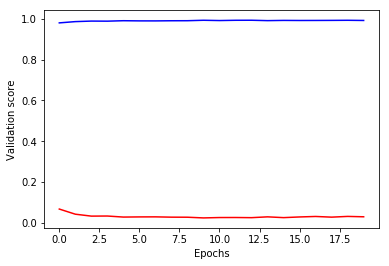

In [18]:
import matplotlib.pyplot as plt 

# Create the plot
plt.plot(history.history['val_loss'], 'r', history.history['val_acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030434240905169645
Test accuracy: 0.991


In [20]:
# serialize model to JSON
model_digit_json = model.to_json()
with open("mnist_cnn.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("mnist_cnn.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
import shap
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

In [24]:
e = shap.DeepExplainer(model, background)

C:\Users\Matteo Di Giovinazzo\AppData\Roaming\Python\Python36\site-packages\shap\explainers\deep.py:63: UserWarning: Please keep in mind DeepExplainer is brand new, and we are still developing it and working on characterizing/testing it on large networks. This means you should keep an eye out for odd behavior. Post any issues you run into on github.
  "behavior. Post any issues you run into on github."


In [26]:
shap_values = e.shap_values(X_test[1:5])

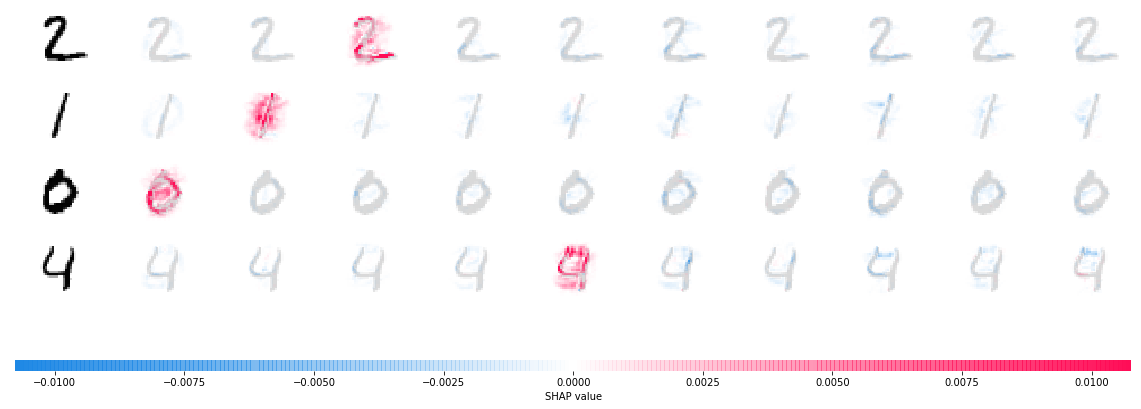

In [27]:
shap.image_plot(shap_values, -X_test[1:5])